### Kernel Density Estimation

The goal of this notebook is to find the optimal bandwidth for a Kernel Density Estimation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#### Let us randomly generate some sample points

In [4]:
def make_data(N, f=0.3, rseed=1):
    x = np.random.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

#### Let us plot a histogram of the sampled values

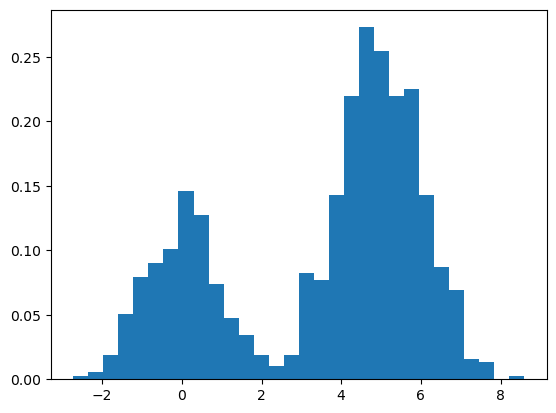

In [5]:
hist = plt.hist(x, bins=30, density=True, stacked=True)

#### Let us confirm pdf is 1.0

In [6]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

#### The choice of bin size and location can lead to representations that have qualitatively different features

In [7]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

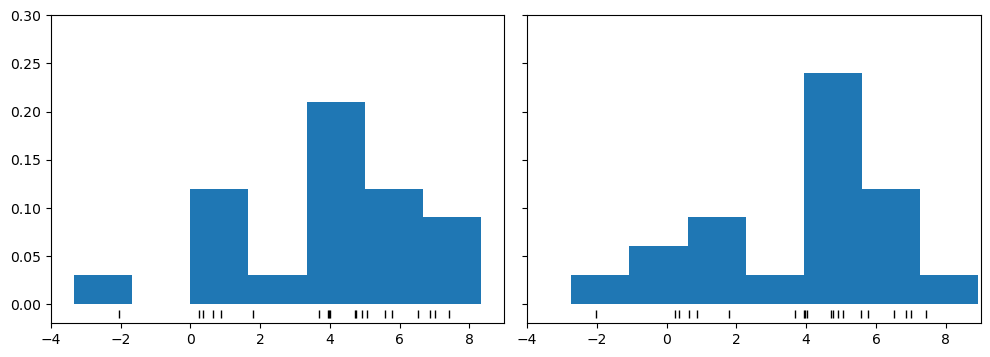

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, density=True, stacked=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k',
               markeredgewidth=1)

#### So rather than using a histogram, let us fit a normal at each of the sampled points

(-4.0, 8.0, -0.2, 5.0)

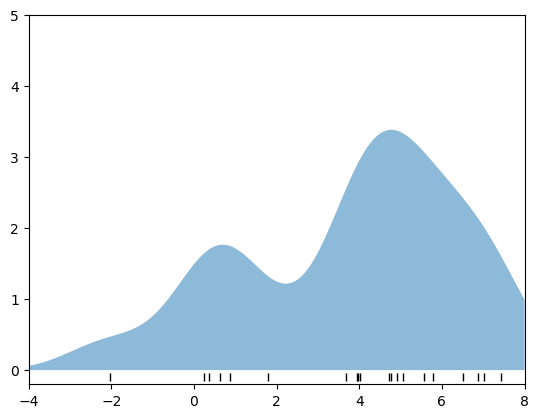

In [9]:
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5])

#### We can do the same using python libraries

In [31]:
from sklearn.neighbors import KernelDensity

# instantiate and fit the KDE model
def fit_kde(ax, bandwidth=2.0):
    # KDE
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(x[:, None])

    # score_samples returns the log of the probability density
    logprob = kde.score_samples(x_d[:, None])

    ax.fill_between(x_d, np.exp(logprob), alpha=0.5)
    ax.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    ax.set_title(f"bandwidth = {bandwidth:.3f}")
    ax.set_ylim(-0.02, 0.22)


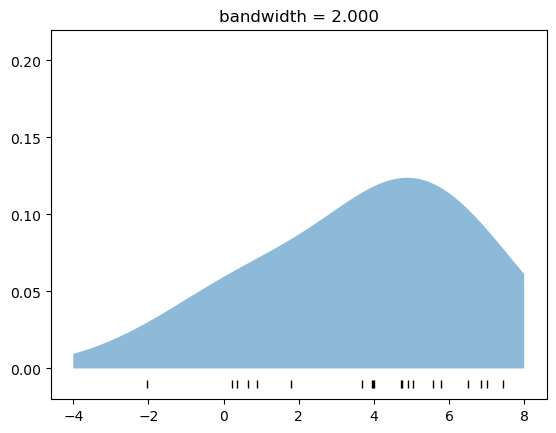

In [32]:
fig, ax = plt.subplots(1, 1)
fit_kde(ax = ax)

#### Finding bandwidth
The `bandwidth` is an important hyper-parameter for the kde. Lets, try running the function above with different values of bandwidth ranging from [0,2]

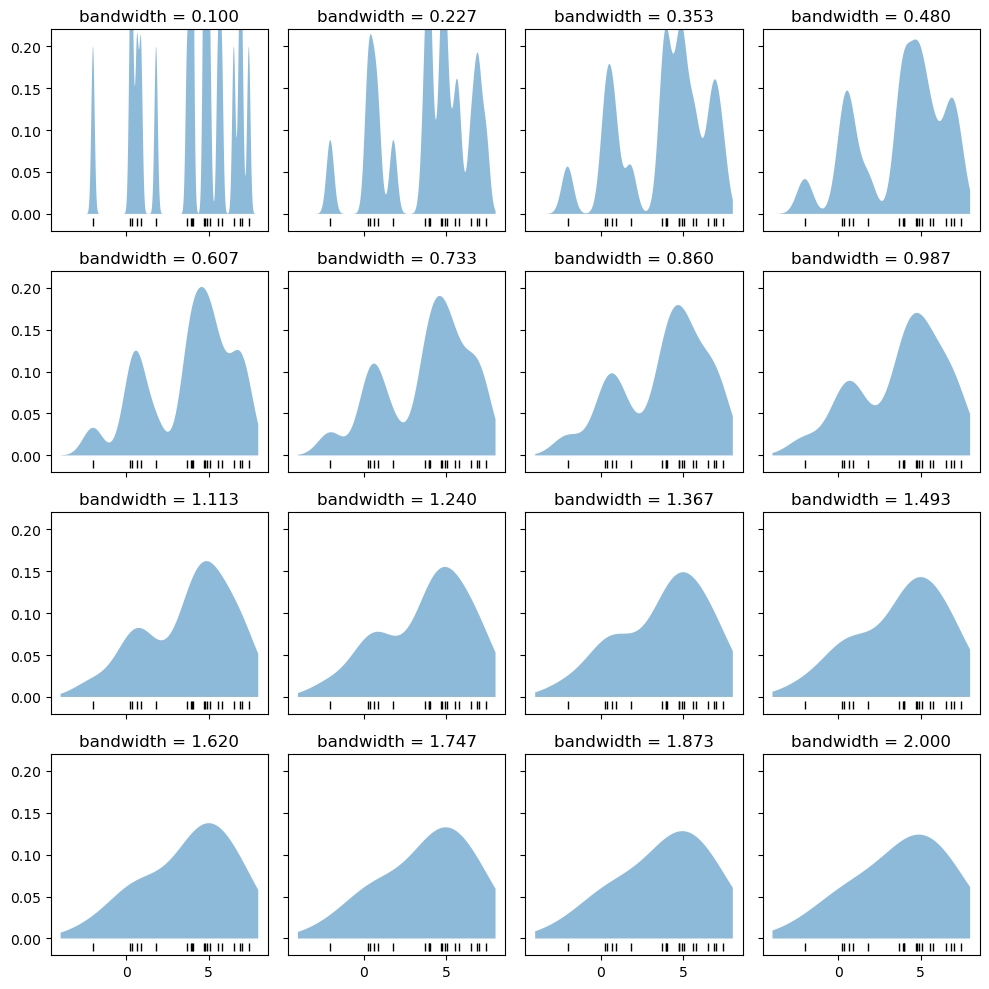

In [34]:
no_bw = 16 # pick a square number
bandwidth_02 = np.linspace(0.1,2,no_bw)
dim = int(no_bw**0.5)

fig, axs = plt.subplots(dim, dim, figsize = (10, 10), sharey=True, sharex=True)
axs = axs.ravel()
for i, bw in enumerate(bandwidth_02):
    fit_kde(ax = axs[i], bandwidth = bw)

plt.tight_layout()

#### Let us try to find the best bandwidth using GridSearch and Idea of Cross validation

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
# We use GridSearch CV and Leave One out Cross validation to find the best bandwidth

grid = GridSearchCV(KernelDensity(),{'bandwidth':bandwidths}, cv = LeaveOneOut())
grid.fit(x[:, None])
best_bw = grid.best_params_
print('Best Bandwidth:' ,best_bw['bandwidth'].round(3))

Best Bandwidth: 1.292


#### Let's fit the KDE based on the best `bandwidth` value learnt

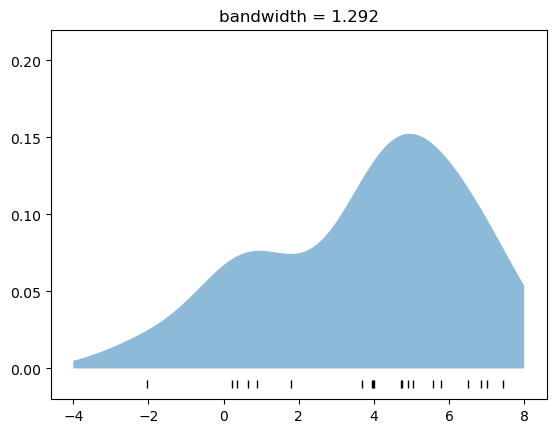

In [40]:
fit_kde(plt.subplot(111),
        best_bw["bandwidth"])